## CAPM 전제
1. 완전자본시장 - 효율적/정보완전대칭/완전경쟁
2. 무위험자산의 존재
3. 모든 투자자들은 기본적으로 합리적이고 위험을 회피하고자 함

## CAPM 공식
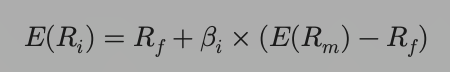
- 자산 기대수익률
- 무위험 수익률(채권 등)
- 베타 계수
- 시장 위험 프리미엄 (시장 - 무위험)

## 베타 공식
- 베타 > 1 : 시장보다 큰 변동성
- 베타 < 1 : 시장보다 작은 변동성
- 베타 = 1 : 시장과 똑같은 변동성
- 베타 = 0 : 변동성이 시장과 무관함(채권 등)
- 베타 < 0 : 시장과 반비례하는 변동성

<br>

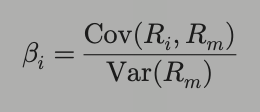
- `주식(포트폴리오) 수익률`과 `시장 수익률` 간 공분산
- `시장 수익률` 분산



In [39]:
# 야후 파이낸스에서 주가 정보 불러오기
import yfinance as yf
import pandas as pd

start = '2024-08-01'
end = '2024-10-01'
symbol = ['005930.KS']

prices = yf.download(symbol, start, end, interval='1d')
# interval파라미터 : "1m", "2m", "5m", "15m", "30m", "60m", "90m", "1d", "5d", "1wk", "1mo", "3mo"

prices[f'{symbol} Return'] = prices['Adj Close'].pct_change()

prices = prices.reset_index()
prices = prices[['Date', f'{symbol} Return']]
prices.head()
# prices[['Adj Close', 'Monthly Return']]

[*********************100%***********************]  1 of 1 completed


,Date,['005930.KS'] Return
0,2024-08-01,NaN
1,2024-08-02,-0.042118
2,2024-08-05,-0.103015
3,2024-08-06,0.015406
4,2024-08-07,0.030345


In [40]:
# 야후 파이낸스에서 주가 정보 불러오기
import yfinance as yf
import pandas as pd

start = '2024-08-01'
end = '2024-10-01'
symbol = ['SPY']

prices2 = yf.download(symbol, start, end, interval='1d')
# interval파라미터 : "1m", "2m", "5m", "15m", "30m", "60m", "90m", "1d", "5d", "1wk", "1mo", "3mo"

prices2[f'{symbol} Return'] = prices2['Adj Close'].pct_change()

prices2 = prices2.reset_index()
prices2 = prices2[['Date', f'{symbol} Return']]
prices2.head()
# prices[['Adj Close', 'Monthly Return']]

[*********************100%***********************]  1 of 1 completed


,Date,['SPY'] Return
0,2024-08-01,NaN
1,2024-08-02,-0.018618
2,2024-08-05,-0.029124
3,2024-08-06,0.009220
4,2024-08-07,-0.006684


In [41]:
# full outer join
prices_12 = pd.merge(prices, prices2, on='Date', how='outer')
prices_12.head()

,Date,['005930.KS'] Return,['SPY'] Return
0,2024-08-01,NaN,NaN
1,2024-08-02,-0.042118,-0.018618
2,2024-08-05,-0.103015,-0.029124
3,2024-08-06,0.015406,0.009220
4,2024-08-07,0.030345,-0.006684


In [42]:
prices_12.shape

(43, 3)

In [43]:
# 앞서 읽어 들인 포트폴리오 수익률의 변동성, 공분산, 베타를 계산한다
import math

vol_m = prices_12["['SPY'] Return"].std() * math.sqrt(250)
vol_A = prices_12["['005930.KS'] Return"].std() * math.sqrt(250)
print('SPY 연간변동성: {:0.2%}'.format(vol_m))
print('Samsung의 연간변동성: {:0.2%}'.format(vol_A))

covs = prices_12.cov()
cov_mA = covs.loc["['SPY'] Return", "['005930.KS'] Return"]
var_m = prices_12["['SPY'] Return"].var()
beta_A = cov_mA / var_m
print('Samsung의 beta: {:.4f}'.format(beta_A))


SPY 연간변동성: 16.21%
Samsung의 연간변동성: 41.00%
Samsung의 beta: 0.9463


In [37]:
import numpy as np

beta52 = [1.38, 0.47, 1.02] # 포트폴리오의 세 가지 자산의 베타값들
investment = [5, 2, 3] # 각 자산에 투자된 금액

sumOfInvestment = sum(investment) # 투자자산의 총금액 (포트폴리오 총금액)
weights = [ w/sumOfInvestment for w in investment ] # 각 자산별 투자비중 계산

beta = np.dot(beta52, weights) # 엑셀의 SUMPRODUCT같은 친구 -> 자산의 비중에 따른 최종 베타

print('The portfolio beta is {0:0.2f}'.format(beta))

The portfolio beta is 1.09


In [38]:
beta = 1.09 # 포트폴리오의 최종 베타
rf = 4 # 무위험 이자율
marketReturn = 10 # 시장 수익률

expReturnPortfolio = rf + (marketReturn - rf) * beta # CAPM = 무위험이자율 + (시장수익률 - 무위험이자율)*최종베타

print('The expection return of the portfolio is {0:0.2f}'.format(expReturnPortfolio))

The expection return of the portfolio is 10.54
